# Brazilian E-commerce Public Dataset by Olist
##### This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

##### Let's check what the data has to offer.

In [73]:
#import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Kindly edit the path for the CSVs instead of ~

In [74]:
#read all the datasets into different variables
cust = pd.read_csv('~/Data_mining/DataArchives/olist_customers_dataset.csv') #customer data cust id PK
loc = pd.read_csv('~/Data_mining/DataArchives/olist_geolocation_dataset.csv') #location details zip code PK
order = pd.read_csv('~/Data_mining/DataArchives/olist_order_items_dataset.csv') #orders order id PK
pay = pd.read_csv('~/Data_mining/DataArchives/olist_order_payments_dataset.csv')#payment info Payment id PK
review = pd.read_csv('~/Data_mining/DataArchives/olist_order_reviews_dataset.csv') #reviews review id PK
ord_cust = pd.read_csv('~/Data_mining/DataArchives/olist_orders_dataset.csv') # order and cust id PK
product = pd.read_csv('~/Data_mining/DataArchives/olist_products_dataset.csv')# product id PK
sellers = pd.read_csv('~/Data_mining/DataArchives/olist_sellers_dataset.csv')# seller id PK
prd_name = pd.read_csv('~/Data_mining/DataArchives/product_category_name_translation.csv') #translation data

In [75]:
#check for null values
print(cust.isnull().sum())
print(order.isnull().sum())
print(pay.isnull().sum())
print(review.isnull().sum())
print(ord_cust.isnull().sum())
print(product.isnull().sum())
print(sellers.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2

##### Descriptive Statistics

In [76]:
cust.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,99441,99441,2b99e152f2351410951c503a2f6a2d7e,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_unique_id,99441,96096,8d50f5eadf50201ccdcedfb9e2ac8455,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_zip_code_prefix,99441,NaN,NaN,NaN,35137.5,29797.9,1003,11347,24416,58900,99990
customer_city,99441,4119,sao paulo,15540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_state,99441,27,SP,41746,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
order.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_item_id,112650,NaN,NaN,NaN,1.19783,0.705124,1,1,1,1,21
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_id,112650,3095,6560211a19b47992c3666cc44a7e94c0,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shipping_limit_date,112650,93318,2017-07-21 18:25:23,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,112650,NaN,NaN,NaN,120.654,183.634,0.85,39.9,74.99,134.9,6735
freight_value,112650,NaN,NaN,NaN,19.9903,15.8064,0,13.08,16.26,21.15,409.68


In [78]:
pay.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,103886,99440,fa65dad1b0e818e3ccc5cb0e39231352,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_sequential,103886,NaN,NaN,NaN,1.09268,0.706584,1,1,1,1,29
payment_type,103886,5,credit_card,76795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_installments,103886,NaN,NaN,NaN,2.85335,2.68705,0,1,1,4,24
payment_value,103886,NaN,NaN,NaN,154.1,217.494,0,56.79,100,171.838,13664.1


In [79]:
review.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
review_id,100000,99173,4219a80ab469e3fc9901437b73da3f75,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,100000,99441,c88b1d1b157a9999ce368f218a407141,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_score,100000,NaN,NaN,NaN,4.07089,1.35966,1,4,5,5,5
review_comment_title,11715,4600,Recomendo,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_comment_message,41753,36921,Muito bom,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_creation_date,100000,637,2017-12-19 00:00:00,466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_answer_timestamp,100000,99010,2017-06-15 23:21:05,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
ord_cust.describe(include='all').T

,count,unique,top,freq
order_id,99441,99441,331179a115e1b772b2f4ff3f99f0c713,1
customer_id,99441,99441,0f139d1b208a62a37671423e5eff5016,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2017-11-20 10:59:08,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-07-24 21:36:42,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


In [81]:
product.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,32951,32951,8f83335d6508c667813ff14dc437bc81,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_name,32341,73,cama_mesa_banho,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name_lenght,32341,NaN,NaN,NaN,48.4769,10.2457,5,42,51,57,76
product_description_lenght,32341,NaN,NaN,NaN,771.495,635.115,4,339,595,972,3992
product_photos_qty,32341,NaN,NaN,NaN,2.18899,1.73677,1,1,1,3,20
product_weight_g,32949,NaN,NaN,NaN,2276.47,4282.04,0,300,700,1900,40425
product_length_cm,32949,NaN,NaN,NaN,30.8151,16.9145,7,18,25,38,105
product_height_cm,32949,NaN,NaN,NaN,16.9377,13.6376,2,8,13,21,105
product_width_cm,32949,NaN,NaN,NaN,23.1967,12.079,6,15,20,30,118


In [82]:
sellers.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
seller_id,3095,3095,cd233f8bfa30ebfd651f47ee7d054951,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_zip_code_prefix,3095,NaN,NaN,NaN,32291.1,32713.5,1001,7093.5,14940,64552.5,99730
seller_city,3095,611,sao paulo,694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_state,3095,23,SP,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#change to datetime datatype
ord_cust['order_purchase_timestamp'] = pd.to_datetime(ord_cust['order_purchase_timestamp'])

#### Number of orders over the years

In [84]:
order_date = pd.DataFrame(ord_cust.groupby(ord_cust['order_purchase_timestamp'].dt.date).size(),columns = ['count'])

#### Kindly run the below cell to view the Bokeh Graph

In [85]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

p1 = figure(x_axis_type="datetime", title="Number of Orders Trend")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Order Purchased on'
p1.yaxis.axis_label = 'Quantity'
p1.line(order_date.index, order_date['count'], color='green', legend_label='Olist Order Quantity')
p1.legend.location = "top_left"

show(p1)

Loading BokehJS ...

#### Olist Revenue Trend

In [86]:
ord_price = pay.merge(ord_cust,left_on='order_id',right_on='order_id')

In [87]:
prices = pd.concat([ord_price['order_purchase_timestamp'], ord_price['payment_value']], axis=1, keys=['date', 'price'])
prices = prices.groupby(prices['date'].dt.date).sum()

#### Kindly run the below cell to view the Bokeh Graph

In [88]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

p1 = figure(x_axis_type="datetime", title="Olist Sales")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Order Purchased on'
p1.yaxis.axis_label = 'Price'
p1.line(prices.index, prices['price'], color='Red', legend_label='Revenue')
p1.legend.location = "top_left"

show(p1)

Loading BokehJS ...

#### EDA on different product categories

In [89]:
category = order.merge(product,left_on='product_id',right_on='product_id')
category = category.merge(prd_name,left_on='product_category_name',right_on='product_category_name')
num_of_prod = pd.DataFrame(category.groupby(category['product_category_name_english']).size(),columns = ['count'])
num_of_prod = num_of_prod.sort_values(by='count',ascending=False)

In [90]:
temp = num_of_prod.head(20)
if len(num_of_prod) > 20:
    temp.loc['remaining {0} categories'.format(len(num_of_prod) - 20)] = sum(num_of_prod['count'][20:])

/home/rdcosta/miniconda3/envs/dm_w2/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


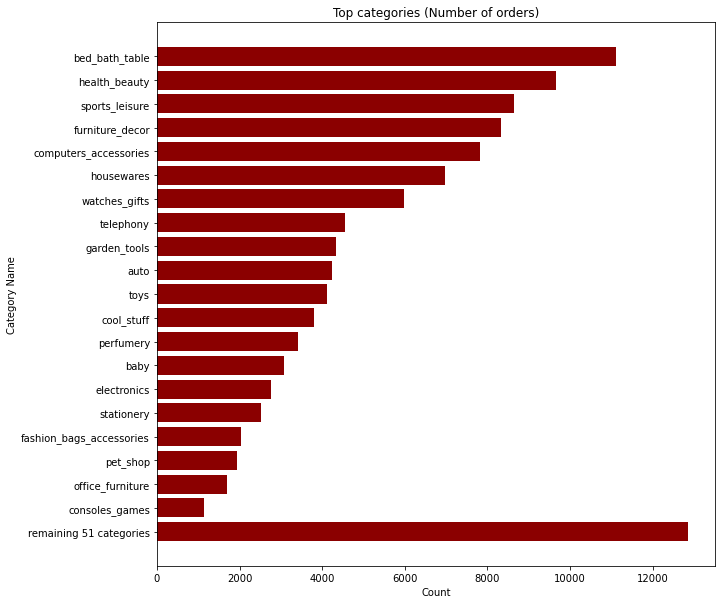

In [91]:
plt.figure(figsize=(10,10))
plt.barh(temp.index,temp['count'],color='darkred')
plt.xlabel('Count')
plt.ylabel('Category Name')
plt.title('Top categories (Number of orders)')
plt.gca().invert_yaxis()
plt.show()

#### Top 5 customers with highest number of orders

In [92]:
cust_loc = ord_cust.merge(cust,left_on = 'customer_id',right_on='customer_id')

In [93]:
main_cust = pd.DataFrame(cust_loc.groupby('customer_unique_id').size(),columns=['count'])
main_cust = main_cust.sort_values(by='count',ascending=False)
main_cust = main_cust.merge(cust_loc,left_on = main_cust.index,right_on='customer_unique_id')
main_cust = pd.concat([main_cust['customer_unique_id'],main_cust['count'],main_cust['customer_city'],main_cust['customer_state']], axis=1, keys=['cust_id', 'order_count','cust_city','cust_state'])
main_cust = main_cust.drop_duplicates()
main_cust = main_cust.sort_values(by='order_count',ascending=False)
main_cust = main_cust.reset_index(drop=True)
main_cust.head()

,cust_id,order_count,cust_city,cust_state
0,8d50f5eadf50201ccdcedfb9e2ac8455,17,sao paulo,SP
1,3e43e6105506432c953e165fb2acf44c,9,praia grande,SP
2,6469f99c1f9dfae7733b25662e7f1782,7,santos,SP
3,1b6c7548a2a1f9037c1fd3ddfed95f33,7,ituiutaba,MG
4,ca77025e7201e3b30c44b472ff346268,7,recife,PE


#### Top 5 customers with highest money spent

In [94]:
temp = cust_loc.merge(pay,left_on='order_id',right_on='order_id')
temp2 = pd.concat([temp['customer_unique_id'],temp['payment_value']],axis=1,keys=['cust_id','price'])
temp2 = temp2.groupby('cust_id').sum()
cust_pay = temp.merge(temp2,right_on= temp2.index, left_on = 'customer_unique_id')
cust_pay = pd.concat([cust_pay['customer_unique_id'] , cust_pay['price'] , cust_pay['customer_city'] , cust_pay['customer_state']],axis=1,keys=['cust_id','Amount','cust_city','cust_state'])
cust_pay = cust_pay.sort_values(by='Amount',ascending=False)
cust_pay = cust_pay.drop_duplicates()
cust_pay = cust_pay.reset_index(drop=True)
cust_pay.head()

,cust_id,Amount,cust_city,cust_state
0,0a0a92112bd4c708ca5fde585afaa872,13664.08,rio de janeiro,RJ
1,46450c74a0d8c5ca9395da1daac6c120,9553.02,florianopolis,SC
2,da122df9eeddfedc1dc1f5349a1a690c,7571.63,araruama,RJ
3,763c8b1c9c68a0229c42c9fc6f662b93,7274.88,vila velha,ES
4,dc4802a71eae9be1dd28f5d788ceb526,6929.31,campo grande,MS


#### Top 5 categories with highest revenue

In [95]:
top_category_revenue = category.merge(pay,left_on = 'order_id' , right_on = 'order_id')

In [96]:
top_category_revenue = pd.concat([top_category_revenue['product_category_name_english'] , top_category_revenue['payment_value']],axis=1,keys=['category','revenue'])
top_category_revenue = top_category_revenue.groupby('category').sum()
top_category_revenue.head(5)

,revenue
category,
agro_industry_and_commerce,118730.61
air_conditioning,91170.66
art,30992.93
arts_and_craftmanship,2326.17
audio,60324.62


#### Comparing descriptive statistics of product price with payment value

In [97]:
order['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [98]:
pay['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

#### EDA on location and sales

In [99]:
cust_state = pd.DataFrame(cust_loc.groupby('customer_state').size(),columns=['count'])
cust_state = cust_state.sort_values(by='count',ascending=False)

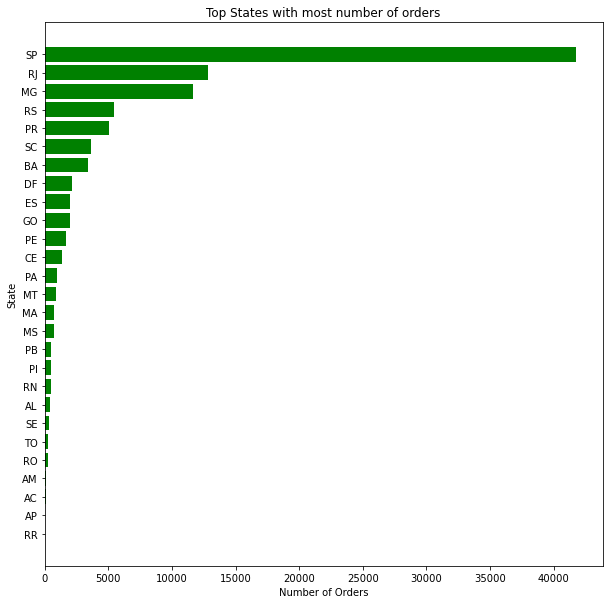

In [100]:
plt.figure(figsize=(10,10))
plt.barh(cust_state.index,cust_state['count'], color='green')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.title('Top States with most number of orders')
plt.gca().invert_yaxis()
plt.show()

In [101]:
temp3 = cust_loc.merge(pay,left_on='order_id',right_on='order_id')
state_pay = pd.concat([temp3['customer_state'] , temp3['payment_value']],axis=1,keys=['state','amount'])
state_pay = state_pay.groupby('state').sum()
state_pay = state_pay.sort_values(by='amount',ascending=False)

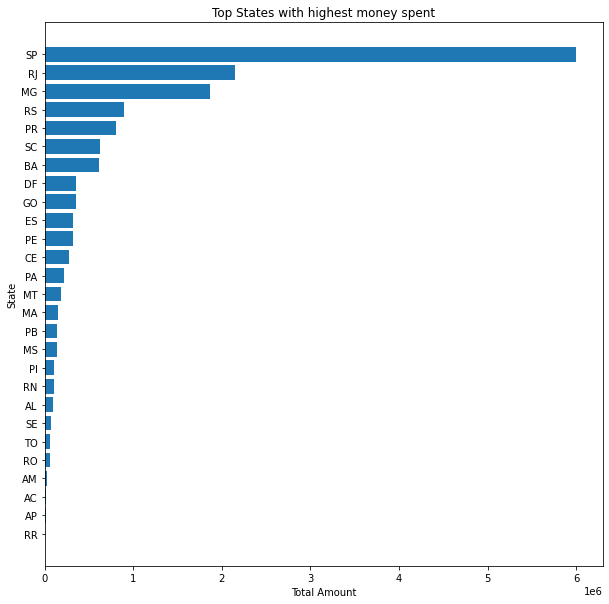

In [102]:
plt.figure(figsize=(10,10))
plt.barh(state_pay.index,state_pay['amount'])
plt.xlabel('Total Amount')
plt.ylabel('State')
plt.title('Top States with highest money spent')
plt.gca().invert_yaxis()
plt.show()